In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import ttest_ind


# **Exploratory Data Analysis (EDA)**

To begin, let's load the dataset that we will be using for this Exploratory Data Analysis (EDA).

In [81]:
# loading data
df = pd.read_csv(r'C:\Users\hafeez_poldz\Desktop\Thinkful\Unit 1\Datas\StudentPerformance\StudentsPerformance.csv')

In [82]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [83]:
# checking for NaN values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [85]:
df.drop_duplicates()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [86]:
# checking range of values
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


It looks like we have 8 different columns, each representing a corresponding variable below:

    - gender: Sex of exam taker
    - race/ethnicity: Ethnic groups an exam takers belong to
    - parental level of education: Education of exam takers
    - lunch: Lunch option chosen by exam takers
    - test preparation course: Preparation course completion
    - math score: Exam score received for the math section (minimum score 0, maximum 100)
    - reading score: Exam score received for the reading section (minimum score 17, maximum 100)
    - writing score: Exam score received for the writing section (minimum score 10, maximum 100)
Dataset does not have duplicate entries. 

# **1. Choose one variable and plot that variable four different ways.**  
Math score will be our variable for this task

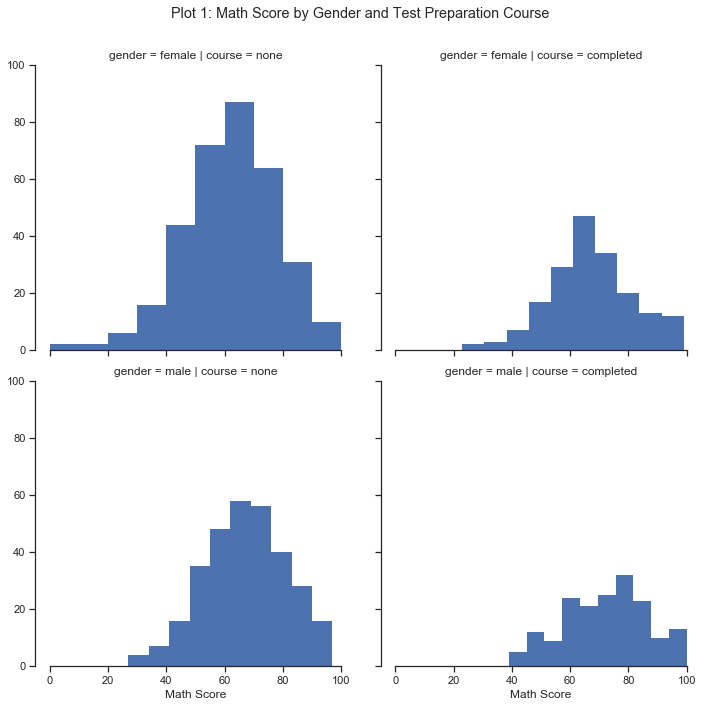

female    518
male      482
Name: gender, dtype: int64


In [116]:
# math score by gender and test preparation course
df.rename(columns = {'test preparation course':'course'}, inplace = True)
df.rename(columns = {'parental level of education':'education'}, inplace = True)

sns.set(style="ticks")
_ = sns.FacetGrid(df, col = 'course', row = 'gender', height=5, aspect=1)
_.map(plt.hist, 'math score', color = 'b', lw = 0, )
_.set_axis_labels('Math Score')
_.set(ylim = (0,100))
plt.suptitle('Plot 1: Math Score by Gender and Test Preparation Course')
plt.subplots_adjust(top = 0.9)
sns.despine(trim=True)
plt.show()

print(df.gender.value_counts())

With the plot 1, we separate the groups into subplots so we can actually see them. All four subplots have the same x-axis, ranging from 0 to 100, and the same y-axis, ranging from 0 to 80. At a glance, we can see that most of the data come from women who have not taken a preparation course. With some effort, by comparing subplots we can also see that less than half of exam takers completed a preparation course, and an average math score of men seems to be higher than that of women.

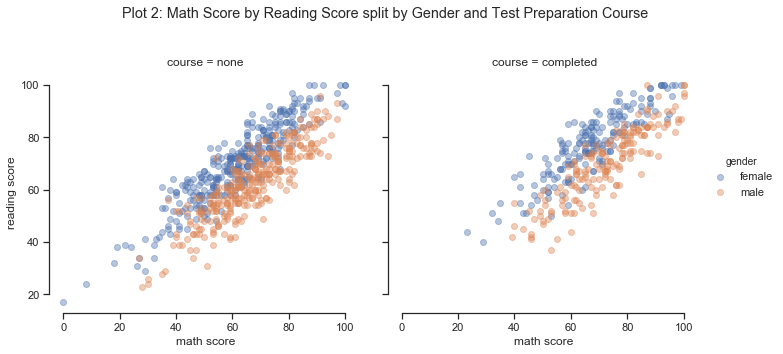

In [88]:
_ = sns.FacetGrid(df, col="course", hue="gender", height=5, aspect=1)
_.map(plt.scatter, "math score", "reading score", alpha = 0.4)
plt.suptitle('Plot 2: Math Score by Reading Score split by Gender and Test Preparation Course')
plt.subplots_adjust(top = 0.8)
sns.despine(trim=True)
_.add_legend()
plt.show()

Plot 2 shows the correlation between reading score and math score split by gender and test preparation course. We can conclude that these two variables are highly positively correlated. First figure also shows that our data has few outliers

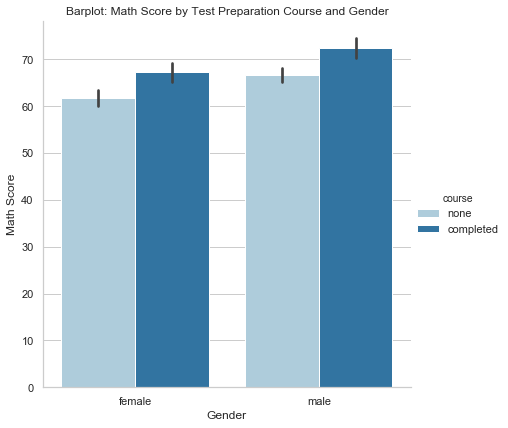

In [113]:
# comparing groups using barplots with 95% confidence interval
_ = sns.catplot(x = 'gender', y = 'math score', hue = 'course', data = df, kind = 'bar', palette = 'Paired', 
                ci = 95, height = 6, aspect = 1)
_.set_ylabels('Math Score')
_.set(xlabel = 'Gender', title = 'Barplot: Math Score by Test Preparation Course and Gender')
plt.show()

Barplot shows comparison among gender (discrete categories). The x-axis of the chart shows the gender being compared, and the y-axis represents a math score. The height of bars is proportional to the values that genders represent. 
The lines through a point on a graph, parallel to the y-axis are Error bars. They usually represent the standard deviation of a data set. In this case, error bars have low spread meaning that the data are clumped around the mean. Mean is more reliable as a representative of the data set. 
In our data SD error bars do not overlap. it's a clue that the results that we got are most likely not due to chance or sampling error. The difference may be significant. But we cannot be sure.  We must actually perform a statistical test to draw a conclusion. Plot 1 showed that our data are non-normally distributed. We'll apply Central Limit Theorem for further analysis. 

In [125]:
# creating groups
male_math_score = np.array(df['math score'][(df['gender'] =='male')])
female_math_score = np.array(df['math score'][(df['gender']=='female')])

# computing mean and standard deviation for both groups
print('Male Math Score Mean: {}'.format(np.mean(male_math_score)))
print('Female Math Score Mean: {}'.format(np.mean(female_math_score)))
print('Male Math Score SD: {}'.format(np.std(male_math_score)))
print('Female Math Score SD: {}'.format(np.std(female_math_score)))

# computing difference between means of two groups
diff = np.mean(male_math_score) - np.mean(female_math_score)
print('Difference: ', diff, '\n')

# calculating T-value
print(ttest_ind(male_math_score, female_math_score, equal_var = False))

Male Math Score Mean: 68.72821576763485
Female Math Score Mean: 63.633204633204635
Male Math Score SD: 14.341377060332784
Female Math Score SD: 15.4764928784033
Difference:  5.095011134430216 

Ttest_indResult(statistic=5.398000564160736, pvalue=8.420838109090415e-08)


The p-value in the test is really small (if to convert to decimal notation, p-value: 0.00000008420838109090415), so we can be fairly confident that the difference in means we see is due to a real difference in the groups and not due to variability in the samples.

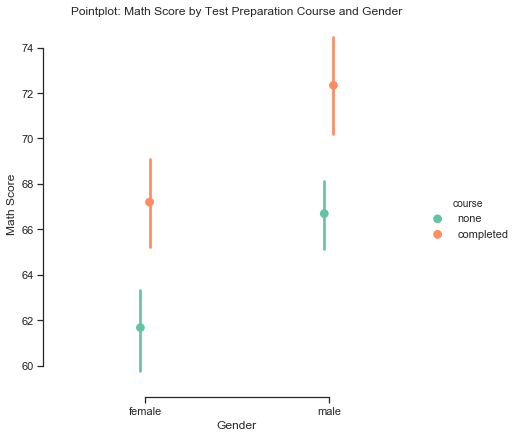

In [91]:
# comparing groups using poitplots 
_ = sns.catplot(x = 'gender', y = 'math score', hue = 'course', data = df, kind = 'point', palette = 'Set2',
               dodge = True, join = False,  height = 6, aspect = 1)
_.set(xlabel = 'Gender', ylabel = 'Math Score', title = 'Pointplot: Math Score by Test Preparation Course and Gender')
sns.despine(offset=10, trim=True)
plt.show()

Barplot and Pointplot simply tell us that students with course completion demonstrate higher exam results than students with no test preparation course. If to compare groups by gender, men overall have higher results. 
Pointplot shows the difference in size between the groups is much more correct compared to the size of the error bars. Moreover, we can observe the mean for male and female as well as the 95% confidence interval

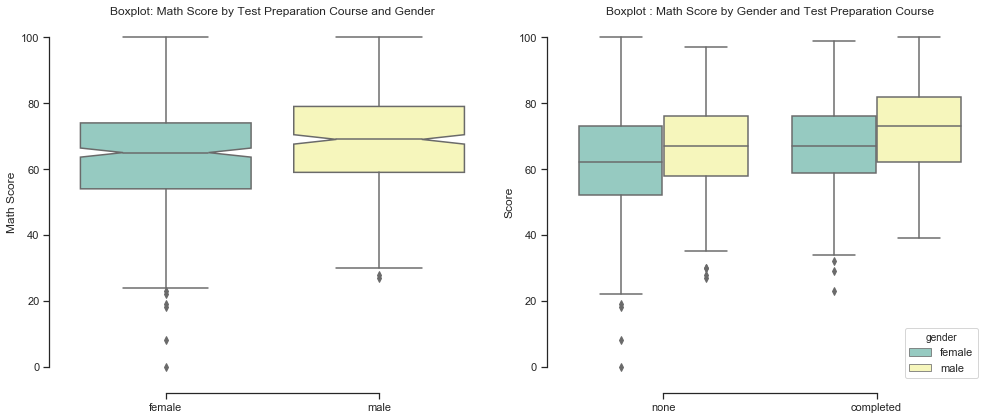

In [92]:
# comparing groups using boxplot
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (14,6))

sns.set_style("whitegrid")
_ = sns.boxplot(x = 'gender', y = 'math score', data = df, notch = True, ax=ax1, palette = 'Set3')
_.set_title('Boxplot: Math Score by Test Preparation Course and Gender')
_.set(xlabel = '', ylabel = 'Math Score')


# comparing the same groups with a different emphasis using boxplot
sns.set_style("whitegrid")
_ = sns.boxplot(x = 'course', y = 'math score', hue = 'gender', data = df, ax=ax2, palette = 'Set3')
_.set_title('Boxplot : Math Score by Gender and Test Preparation Course')
_.set(xlabel = '', ylabel = 'Score')

sns.despine(offset=10, trim=True)
plt.tight_layout()
plt.show()

Using the boxplot, we compare the range and distribution of the math score for female and male split by test preparation course. We observe that there is an almost similar variability for both male and female math score. A female group has larger outliers as well. 

Also, since the notches in the boxplots do not overlap, we can conclude that with 95% confidence, that the true medians do differ.

# **2. Choose two continuous variables, and plot them three different ways.** 
For this task we choose reading score and math score as continuous variables.

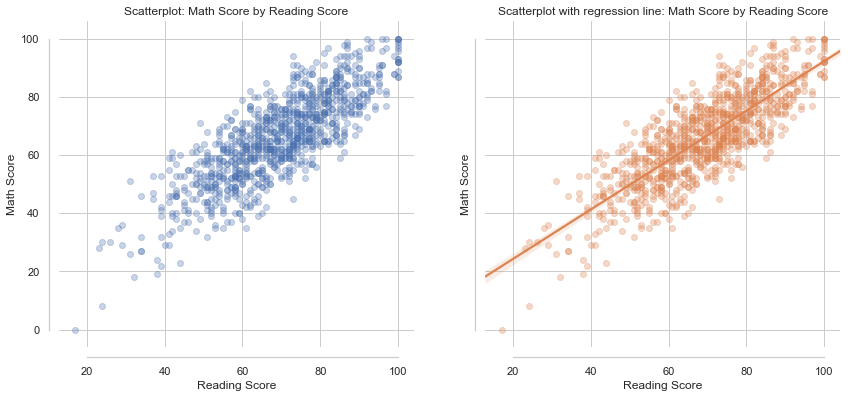

In [93]:
# scatter plot
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize = (14,6))
_ = sns.regplot(x = 'reading score', y = 'math score', data = df, scatter_kws = {'alpha': 0.3}, fit_reg = False, ax = ax1)
_.set(xlabel = 'Reading Score', ylabel = 'Math Score')
_.set_title('Scatterplot: Math Score by Reading Score')

# adding regression line to scatter plot
_ = sns.regplot(x = 'reading score', y = 'math score', data = df, scatter_kws = {'alpha': 0.3}, fit_reg = True, ax = ax2)
_.set(xlabel = 'Reading Score', ylabel = 'Math Score')
_.set_title('Scatterplot with regression line: Math Score by Reading Score')
sns.despine(offset=10, trim=True)
plt.show()


As reading score increases, the math score tended to get higher. Data points cluster togerther tightly, forming straight line going from near the origin out to high y-values. These scatterplots show that the math score and reading score variables are highly positively correlated. 

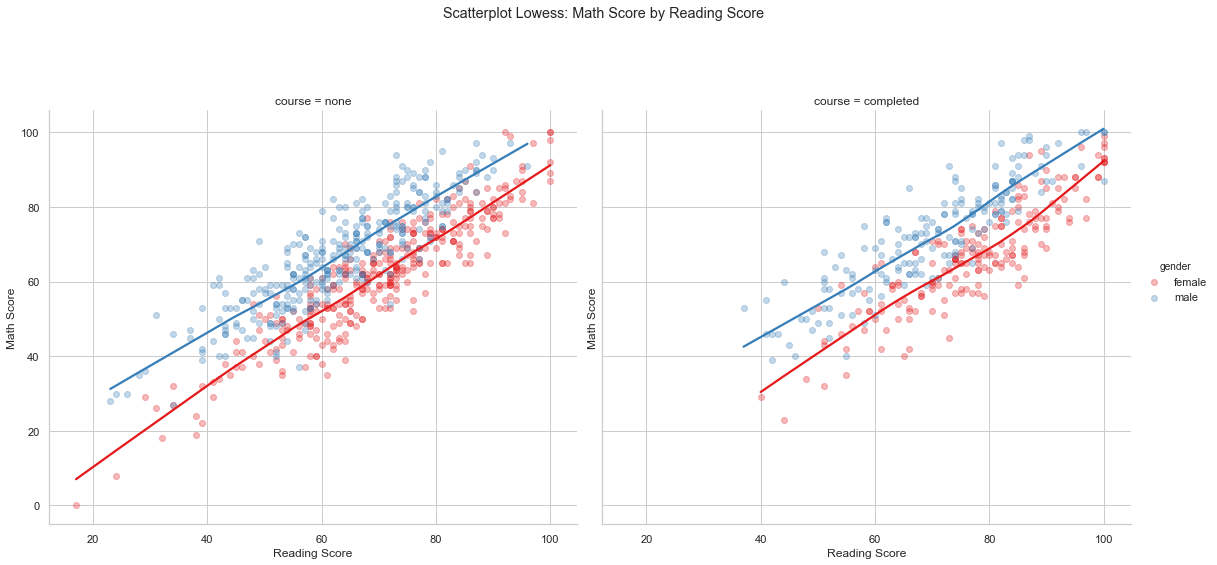

In [94]:
# scatter plot: split by gender and test preparation course
sns.set_style('whitegrid')
_ = sns.lmplot(x = 'reading score', y = 'math score', data = df, hue = 'gender', col = 'course', fit_reg = True,
              scatter_kws = {'alpha': 0.3},  lowess = True, ci = False, palette = 'Set1', height = 8, aspect = 1)
_.set(xlabel = 'Reading Score', ylabel = 'Math Score')
plt.suptitle('Scatterplot Lowess: Math Score by Reading Score')
plt.subplots_adjust(top = 0.8)


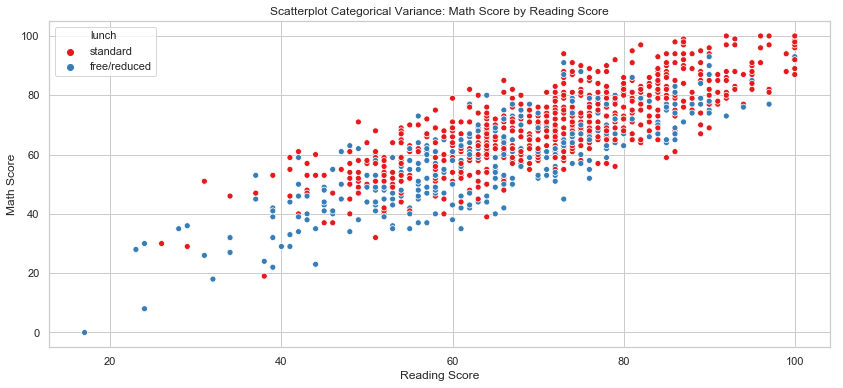

In [95]:
# using a categorical variable (gender) to vary two continuous variables by size
plt.figure(figsize = (14,6))
cmap = sns.cubehelix_palette(dark = 0.2, light = 0.9, as_cmap = True)
_ = sns.scatterplot(x = 'reading score', y = 'math score', hue = 'lunch', data = df,
                    palette = 'Set1')
_.set_title('Scatterplot Categorical Variance: Math Score by Reading Score')
_.set(xlabel = 'Reading Score', ylabel = 'Math Score')
plt.show()

From the last scatter plot we can observe that red dots are dominating over blue dots, meaning that most of the exam takers prefer standard lunch option. 
Looking at the distribution of colors, we can come up with the idea that attendants who have free/reduced lunch option score less than those with standard option. Apparently, the social-economic (or financial) situation of attendants should have an impact on their exam results. 

# **3. Choose one continuous variable and one categorical variable, and plot them six different ways.** 
I'll use swarmplot for this task. In this case I choose writing score as a continuous variable and race/ethnicity as a categorical variable.

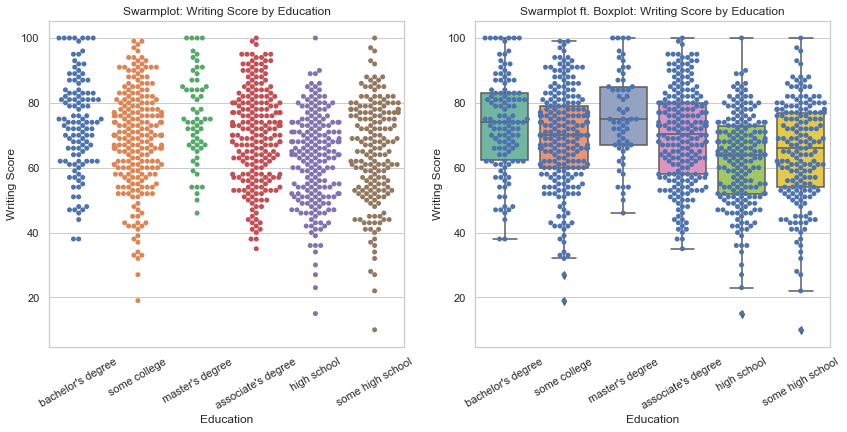

In [96]:
# swarmplot
sns.set_style('whitegrid')
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
_ = sns.swarmplot(x = 'education', y = 'writing score', data = df)
_.set_title('Swarmplot: Writing Score by Education')
_.set(xlabel = 'Education', ylabel = 'Writing Score')
plt.xticks(rotation = 30)

# overlapping swarmplot with boxplot
plt.subplot(1,2,2)
_ = sns.swarmplot(x = 'education', y = 'writing score', data = df, color = 'b')
_ = sns.boxplot(x = 'education', y = 'writing score', data = df, palette = 'Set2')
_.set_title('Swarmplot ft. Boxplot: Writing Score by Education')
_.set(xlabel = 'Education', ylabel = 'Writing Score')
plt.xticks(rotation = 30)
plt.show()


Each point in the bee swarmplot represents the writing score of exam taker by the his/her education level. 

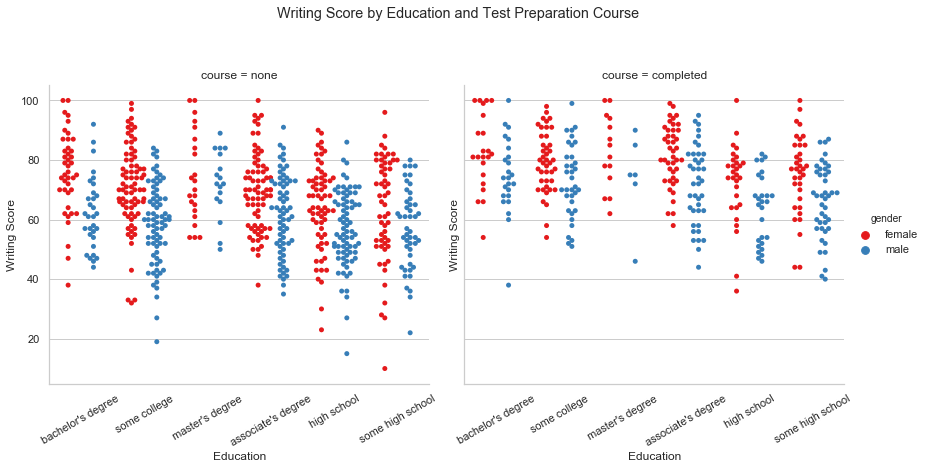

In [97]:
# comparing groups using swarmplot with 95% confidence interval
_ = sns.catplot(x = 'education', y = 'writing score', hue="gender", col="course", data=df, kind="swarm", dodge = True,
                height=6, aspect=1, palette = 'Set1');
_.set(xlabel = 'Education', ylabel = 'Writing Score')
plt.suptitle('Writing Score by Education and Test Preparation Course')
plt.subplots_adjust(top = 0.8)
_.set_xticklabels(rotation=30)
plt.show()

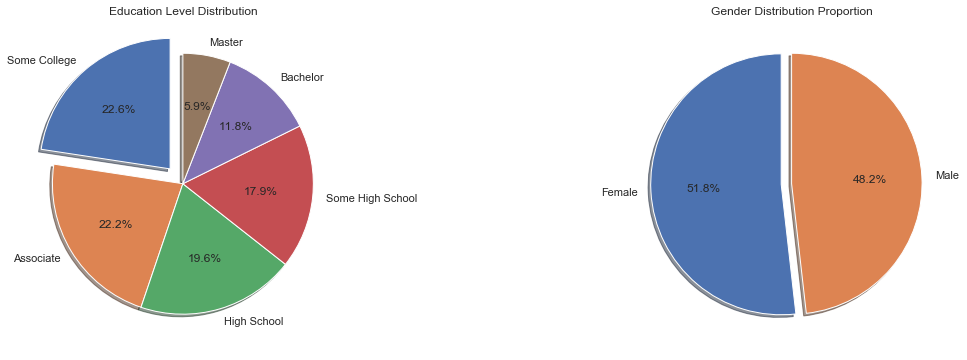

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: education, dtype: int64


In [114]:
plt.figure(figsize = (20,6))
_ = plt.subplot(1,2,1, aspect = 'equal')
labels = ['Some College', 'Associate', 'High School', 'Some High School', 'Bachelor', 'Master']
_ = plt.pie(df['education'].value_counts(), explode = (0.15, 0, 0, 0, 0, 0), labels = labels, startangle=90, shadow = True, 
            autopct = '%1.1f%%')
_ = plt.title('Education Level Distribution')

# transaction proportion by gender
_ = plt.subplot(1,2,2, aspect = 'equal')
_ = plt.pie(df['gender'].value_counts(), explode = (0.08, 0), startangle=90, shadow = True, labels = ['Female','Male'], 
            autopct = '%1.1f%%')
_ = plt.title('Gender Distribution Proportion')
plt.show()
print(df.education.value_counts())

Generally speaking, this exam is popular among individuals with some college (22.6%) and associate's degree (22.2). 51.8 of attendants are female. 

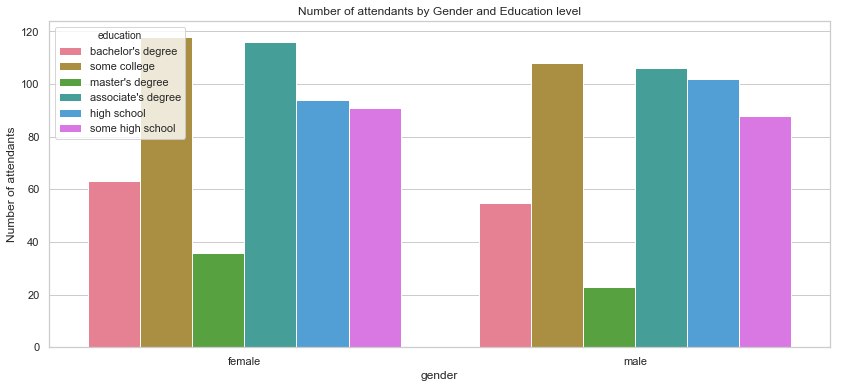

In [99]:
plt.figure(figsize = (14,6))
_ = sns.countplot(x = 'gender', data = df, hue = 'education', palette = 'husl')
_.set(ylabel = 'Number of attendants', title = 'Number of attendants by Gender and Education level')

plt.show()

Graph shows that most of attendants from both gender are with some college and associate's degrees. 

# **Challenge:** 
As an optional challenge, find a dataset with at least four continuous variables and one categorical variable. 
Create one master plot that gives insight into the variables and their interrelationships, including:

1. Probability distributions

2. Bivariate relationships

3. Whether the distributions or the relationships vary across groups.

In [100]:
df2 = pd.read_csv(r'C:\Users\hafeez_poldz\Desktop\Thinkful\Unit 1\Datas\GraduationAdmission\Admission_Predict.csv')
df2 = df2[['GRE Score', 'TOEFL Score', 'SOP', 'CGPA','Research']]
df2.Research.replace(0, 'No', inplace = True)
df2.Research.replace(1, 'Yes', inplace = True)
df2.head()

,GRE Score,TOEFL Score,SOP,CGPA,Research
0,337,118,4.5,9.65,Yes
1,324,107,4.0,8.87,Yes
2,316,104,3.0,8.00,Yes
3,322,110,3.5,8.67,Yes
4,314,103,2.0,8.21,No


In [101]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
GRE Score      400 non-null int64
TOEFL Score    400 non-null int64
SOP            400 non-null float64
CGPA           400 non-null float64
Research       400 non-null object
dtypes: float64(2), int64(2), object(1)
memory usage: 15.7+ KB


This data consists of 5 columns and 400 rows. Columns are:
 - GRE Score: Score received for Graduate Record Examinations
 - TOEFL Score: Score received for Test of English as a Foreign Language
 - SOP: Student Orientation Program score
 - CGPA: Cumulative Grade Point Average
 - Research: Student involved in research

C:\Users\hafeez_poldz\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


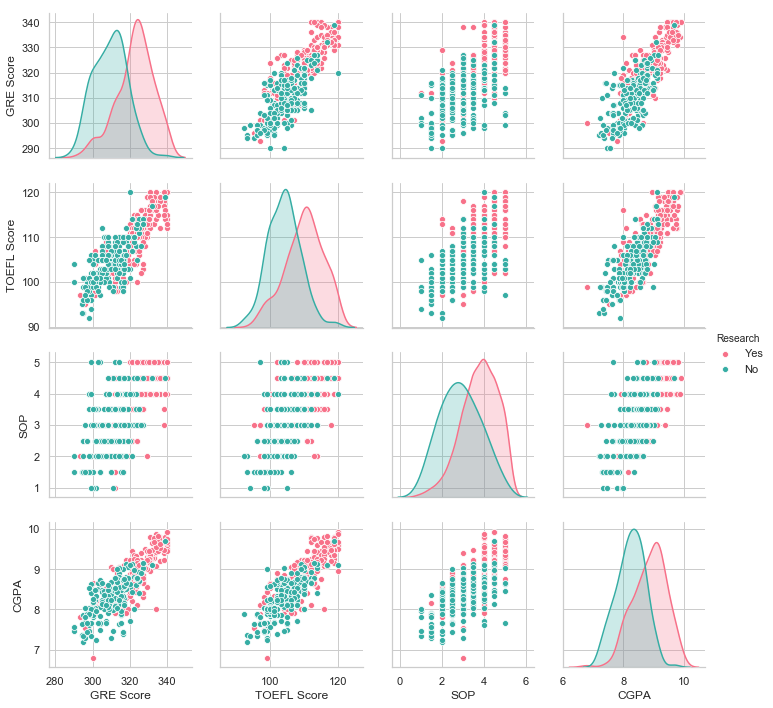

In [102]:
_ = sns.pairplot(df2, hue = 'Research', palette="husl")
plt.show()

The pairplot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution (probability distribution) of a single variable. From histograms we can see that distribution of students involved in research skewed to the right.

The scatter plots on the upper and lower triangles show the relationship between two variables (bivariate relationship). For example, the right-most plot in the second row shows the scatter plot of SOP vs. TOEFL Score. These two variables have low positive correlations.